# Intro to Causal Inference


<img width=80 src="Images/Assembler.png">

# Define causal inference
Causal inference is a field of study interested in measuring the effect of a certain treatment.

Another way to think about causal inference, is that it answers what-if questions. The goal is always to measure some kind of impact given a certain action.

Examples of questions answered with causal inference are:

- What is the impact of running an ad campaign on product sales?
- What is the effect of smoking on lung cancer?
- Does human intervention affects global climate?

# Causal inference vs traditional machine learning

With traditional machine learning techniques, we generate predictions or forecasts given a set of features.

Machine Learning models uncover correlations between features and a target to better predict that target. In that sense, any correlation between some feature and the target is useful if it allows the model to make better predictions.

**Limitations:** While ML models are excellent at prediction, they don't inherently understand causation. A model might find that ice cream sales and shark attacks are correlated (both increase in the summer) but cannot infer that ice cream sales do not cause shark attacks.

When it comes to causal inference, we aim to understand and measure the impact of an intervention or treatment. Therefore, causal inference focuses on uncovering causal pathways, seeking causality rather than mere correlation.

# What is a Ramdomized Controlled Trial?

A randomized controlled trial (RCT) is a prospective experimental design that randomly assigns participants to an experimental or control group. RCTs are the gold standard for establishing causal relationships and ruling out confounding variables and selection bias. Researchers must be able to control who receives the treatments and who are the controls to use this design.

Control groups — generally are not given any medicine, whereas treatment group receives the specific treatment. And then they measure they observe the effectiveness of the improvement in these groups. If they find some positive results, voila sometimes breakthrough results for some disease do happen (after years and years of such experiments).

But.... What if we're testing some effects or radiation over humans? Should we force to smoke to a group of people? Of course not. This is where Causal Inference has its role. It tries to find causal relation or causal paths in data.

# Causal Connections

The causal pathway can be depicted as:

<img src="Images/causal_relation.jpg">



In the figure, offering a discount is called the <strong>treatment</strong> (denoted as the variable T in equations). Discounts may have some effect on the ice cream sales. This is designated as the **outcome** (denoted as Y in equations).

# What is a Bayesian Network?

Bayesian networks are a type of probabilistic graphical model that uses Bayesian inference for probability computations. 

A Bayesian network is a directed acyclic graph in which each edge corresponds to a conditional dependency, and each node corresponds to a unique random variable. Formally, if an edge (A, B) exists in the graph connecting random variables A and B, it means that P(B|A) is a factor in the joint probability distribution, so we must know P(B|A) for all values of B and A in order to conduct inference. 

<img src="Images/BN.png">

In the above example, since Rain has an edge going into WetGrass, it means that P(WetGrass|Rain) will be a factor, whose probability values are specified next to the WetGrass node in a conditional probability table.

# What is a Confounder?

A **confounder** is a variable that influences both the treatment and the outcome.

<img src="Images/confounder.jpg">

From the figure above, we can see that the confounder influences both the treatment and the outcome. Therefore, it can introduce a bias when measuring the treatment effect.

# Measure the treatment effect

Until now, we know that causal inference helps us measure the treatment effect on a certain outcome, but we have to watch out for confounders, as they can introduce a bias in our measurement.

To measure the treatment effect, there are three broad methods:

- <a href="https://en.wikipedia.org/wiki/Randomized_experiment">Randomized experiments</a>, which randomly assign subjects to treatment and control groups to mitigate the influence of confounders. 
- <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/">Measure confounders</a>, a method that involves identifying and adjusting for confounding variables to isolate the treatment's effect.
- <a href="https://en.wikipedia.org/wiki/Instrumental_variables_estimation">Instrument variables</a>, a technique used when randomization is not possible, leveraging variables that influence the treatment but are not directly related to the outcome.


# Causal Inference Programming

First import the required libraries. More info on <a href="https://www.pywhy.org/dowhy/v0.8/getting_started/intro.html">Dowhy</a> and <a href="https://www.pywhy.org/">PyWhy</a>

In [1]:
# !pip install dowhy
# !pip install seaborn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import dowhy
from dowhy import CausalModel
import dowhy.datasets

import warnings
warnings.filterwarnings('ignore')

c:\Users\Luciano Gabbanelli\anaconda3\envs\Assembler\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Now we generate synthetic data. Here, we have a treatment effect value of 8. Then, we add two confounders, an instrument variable, and two features. Finally, we generate 10000 samples and store them in a DataFrame. The treatment is binary, meaning that you either get the treatment or not.

In [2]:
BETA = 8

data = dowhy.datasets.linear_dataset(BETA,
                                    num_common_causes=2, # confounders
                                    num_samples=10000,
                                    num_instruments=1, # instrument variables
                                    num_effect_modifiers=2, # features
                                    treatment_is_binary=True,
                                    stddev_treatment_noise=5,
                                    num_treatments=1)

df = data['df']

We need to visualize the data!!!

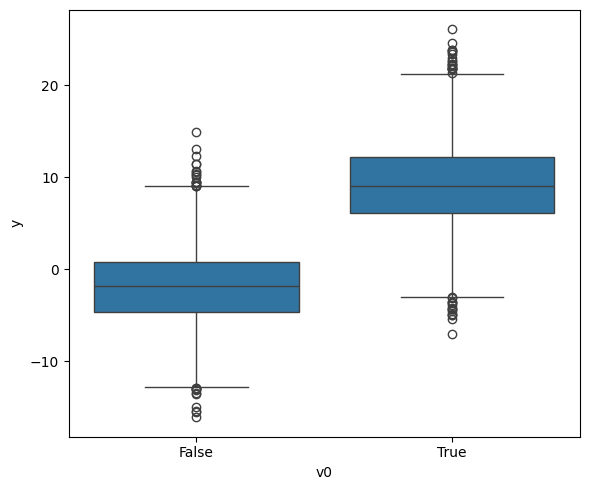

In [3]:
plt.figure(figsize=(6,5))

sns.boxplot(y='y', x='v0', data=df)

plt.tight_layout()

The treated group has a higher average than the untreated group. This is a strong signal of causality, but it is not enough. Spurious correlations occur!!
<br>
<br>
<br>
<br>


<img src="Images/scorr2.png">


While a correlation exists between variables, it does not imply a causal relationship. **There is no causal pathway!**

In theory, a machine learning model might leverage such a correlation to predict outcomes effectively, enhancing its predictive accuracy. However, it's crucial in practice to remain cautious of relying on spurious correlations that don't stem from a genuine causal link. This is particularly important as machine learning models can inadvertently amplify these non-causal relationships.

In contrast, causal inference mandates the identification of a causal pathway before deploying any analytical model. This prerequisite ensures that the effects we measure truly originate from the cause under investigation, not from confounded or coincidental relationships. Such rigor in establishing causality allows for more reliable and actionable insights, which are indispensable for informed decision-making and policy development.

Let's build our model:

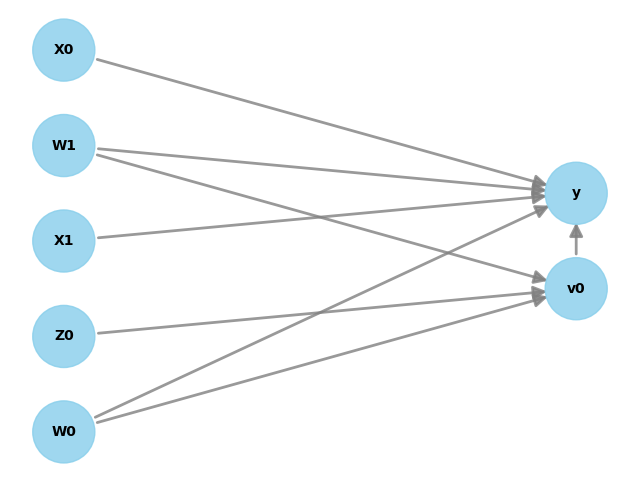

In [4]:
model = CausalModel(data=data['df'],
                   treatment=data['treatment_name'],
                   outcome=data['outcome_name'],
                   graph=data['gml_graph'])

model.view_model()

we have two confounders (W0 and W1) which have an effect on the treatment (v0) and the outcome (y). We also have two instrument variables (Z0 and Z1) related only to the treatment. Finally, we have one feature (X0) affecting the outcome.

Features are variables that impact the outcome directly. In our example of ice cream sales, the temperature could be a feature, since cold temperatures likely mean less ice cream sales, no matter the discount.

We can now identify the different ways of measuring the treatment effect.

In [5]:
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)

print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d              
─────(E[y|W0,W1])
d[v₀]            
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,W1,U) = P(y|v0,W0,W1)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                      -1⎤
 ⎢  d      ⎛  d        ⎞  ⎥
E⎢─────(y)⋅⎜─────([v₀])⎟  ⎥
 ⎣d[Z₀]    ⎝d[Z₀]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0})
Estimand assumption 2, Exclusion: If we remove {Z0}→{v0}, then ¬({Z0}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



to make things easy we'll use Estimand #2: Intrumental variables. 

In [6]:
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="iv.instrumental_variable")

print('Treatment effect: ', causal_estimate.value)

Treatment effect:  9.603782789022553


We fixed the theoretical value to 8 (BETA=8). The method got very close to measuring the real effect of the treatment.

# Model Evaluation

When using causal inference, we do not make predictions. While we know the correct theoretical value for our synthetic data (we fixed it previously), in the real world, there is no target, so we cannot report an error metric, like the MAE or the MSE.

We must evaluate the robustness of the model in identifying a causal effect under assumptions violation.

One way to test that is to add a random common cause. In this procedure, we add an independent random variable as a cause of the outcome. Since the variable is random and independent, it should not impact the our measure of the treatment effect.

In [7]:
res_random=model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause")

print(res_random)

Refute: Add a random common cause
Estimated effect:9.603782789022553
New effect:9.603782789022553
p value:1.0



Adding a random common cause does not change the measured effect. This is further supported by a p-value of 1 (beware of P-Values). We can conclude that the model is robust and we can trust its causal effect estimate.


# Conclusion
We crash-coursed into the field of causal inference. Unlike in traditional machine learning, we are not doing predictions, but instead measuring the impact of a treatment on an outcome.

In real life, many things impact the outcome:

- confounders that affect the treatment and the outcome
- features that affect the outcome directly
- we can add instrument variables that correlate only with the treatment

There are methods to isolate the treatment effect and remove the bias of confounders and features, but domain knowledge and human inputs remain important to design the right causal graph and then use the right methods.

# References

For a gentle introduction (No math, whithout hassle):

<a href="https://en.wikipedia.org/wiki/The_Book_of_Why">The book of Why by Judea Pearl</a>
<img width="200" src="Images/book_of_why.jpg">
<br>


With Math & with hassle (not much):

<a href="https://www.amazon.com/Causal-Inference-Statistics-Judea-Pearl/dp/1119186846/ref=sr_1_2">Causal Inference in Statistics - A Primer</a>
<img width="200" src="Images/causal_primer.jpg">
<br>
    